In [1]:
import sys
import os
import numpy as np
import torch as tr
import pandas as pd
from matplotlib import pyplot as plt

from CSWSEM import *

gs_name = 'liketest1'

In [2]:
seed = int(19)
# sweep params
nosplit = int(0)
learn_rate = float(0.05)
# CRP
alfa = float(0.1)
lmda = float(100)

# model_tag = 'nosplit_%i__cond_%s__learnrate_%.3f__alfa_%.5f__lmbda_%.5f__seed_%i'%(
#   int(nosplit),condition,learn_rate,alfa,lmda,seed)
# print(model_tag)

In [3]:
condition = 'interleaved'
exp_kwargs={
    'condition':condition,
    'n_train':160,
    'n_test':40
}

pdim = 3 
stsize = 5
sem_kwargs={
  'nosplit':nosplit,
  'lmda':lmda,
  'alfa':alfa,
  'seed':seed,
  'rnn': {
    'stsize':stsize,
    'pdim':pdim,
    'learn_rate':learn_rate
  }
}

task = CSWTask(seed=seed)
sem = SEM(**sem_kwargs)


NameError: name 'pdim' is not defined

In [4]:
# run
exp,curr = task.generate_experiment(**exp_kwargs)
sem_data = sem.forward_exp(exp,curr)

# record curriculum (not ideal, recording with every obs)
sem.data.record_exp('condition',condition)

# save
sem_data_df = pd.DataFrame(sem_data)

(0.0, 1.0)

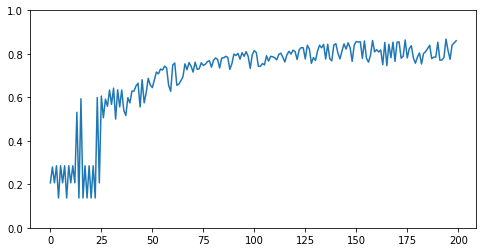

In [5]:
f,ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(1-sem_data_df.loss)
ax.set_ylim(0,1)

In [6]:
sem_data_df

,trial,curriculum,prior,like,active_schema,event_hat,loss,nosplit,stsize,learn_rate,lmda,alfa,seed,condition
0,0,0,"[-2.3025850929940455, -2.3025850929940455]","[-71.80201594178766, -71.80201594178766]",0,"[[0.14792702, -0.012969106, -0.21474713, 0.266...",0.79326296,0,5,0.05,100.0,0.1,19,interleaved
1,1,1,"[4.663439094112067, -2.3025850929940455]","[-211.4746265768627, -67.57205830575585]",1,"[[0.03919962, 0.24319687, 0.3369291, 0.1866924...",0.7203753,0,5,0.05,100.0,0.1,19,interleaved
2,2,0,"[1.791759469228055, 1.791759469228055, -2.3025...","[-103.78724720994902, -112.62423433489099, -71...",2,"[[0.14792702, -0.012969106, -0.21474713, 0.266...",0.79326296,0,5,0.05,100.0,0.1,19,interleaved
3,3,1,"[1.791759469228055, 1.791759469228055, 1.79175...","[-136.00235547845907, -61.34149527445838, -136...",3,"[[0.14792702, -0.012969106, -0.21474713, 0.266...",0.7147538,0,5,0.05,100.0,0.1,19,interleaved
4,4,0,"[1.791759469228055, 1.791759469228055, 1.79175...","[-165.02275432874248, -117.41364333277784, -16...",4,"[[0.14792702, -0.012969106, -0.21474713, 0.266...",0.8628309,0,5,0.05,100.0,0.1,19,interleaved
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,0,"[1.791759469228055, 6.950814768442584, 1.79175...","[-103.78724720994902, 69.23716782824509, -103....",1,"[[0.037195094, 0.25504515, 0.28101194, 0.05102...",0.18429026,0,5,0.05,100.0,0.1,19,interleaved
196,196,1,"[1.791759469228055, 6.956545443151569, 1.79175...","[-211.4746265768627, 44.560015913822646, -211....",1,"[[0.07682152, 0.24839953, 0.2785551, 0.0497307...",0.22508374,0,5,0.05,100.0,0.1,19,interleaved
197,197,0,"[1.791759469228055, 6.962243464266207, 1.79175...","[-103.78724720994902, 76.44763874362835, -103....",1,"[[0.09628508, 0.23776391, 0.2822055, 0.0522273...",0.1594569,0,5,0.05,100.0,0.1,19,interleaved
198,198,0,"[1.791759469228055, 6.967909201801884, 1.79175...","[-103.78724720994902, 84.89534129183363, -103....",1,"[[0.12421441, 0.22797419, 0.28464934, 0.054817...",0.14983033,0,5,0.05,100.0,0.1,19,interleaved


In [7]:
# import pandas as pd
# save_fpath = 'gsdata/%s/%s'%(gs_name,model_tag)
# pd.DataFrame(sem_data).to_csv(save_fpath)